<a href="https://colab.research.google.com/github/Murcha1990/ML_AI24/blob/main/Hometasks/Pro/AI_HW4_woodenML_pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание 4 (pro): древесные алгоритмы**

### **Постановка задач**

### **Домашнее задание состоит из двух подзадач:**

**1. В  разделе 1 ваша задача:**
-  реализовать свое решающее дерево
- сравнить его со стандартной имплементацией из sklearn

Функции и классы дерева вы должны оформить в модуль `hw4_code_pro.py`.

**2. В разделе два ваша задача:** решить задачу бинарной классификации при помощи написанного Вами дерева, а также леса из sklearn, а после интерпретировать лучшие модели. Чуть точнее

- Извлечь данные из базы данных;
- Предобработать датасет;
- Обучить собственный класс DT, а также RF из `sklearn` в как базовом варианте (гиперпараметры по умолчанию), так и с подбором гиперпараметров;
- Интерпретировать алгоритмы при помощи LIME или SHAP.


### **Оценивание:**

- Как всегда оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.
- Брать код из открытых источников позволительно. Следование культуре цитирования **обязательно.**
- Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов.
- Неэффективная реализация кода может негативно отразиться на оценке.

### **Формат сдачи:**
Задания сдаются через  anytask. Посылка должна содержать:
* Ноутбук в формате ipynb
* Модуль hw4_code_pro.py


### **Баллы:**

Суммарно за задание можно получить 10 основных баллов и 1 бонусный балло.

Оценка за ДЗ = min{ваш балл, 10}

Мягкий дедлайн: 27 января 23:59

**Продуктивной и интересной вам работы!**


In [2]:
!pip install optuna
!pip install lime
!pip install shap
!pip install psycopg2-binary

   ---------------------------------------- 0.0/383.4 kB ? eta -:--:--
   --- ----------------------------------- 30.7/383.4 kB 640.0 kB/s eta 0:00:01
   ---- ---------------------------------- 41.0/383.4 kB 487.6 kB/s eta 0:00:01
   ----------- -------------------------- 112.6/383.4 kB 819.2 kB/s eta 0:00:01
   -------------- ----------------------- 143.4/383.4 kB 847.9 kB/s eta 0:00:01
   ---------------------------- ----------- 276.5/383.4 kB 1.2 MB/s eta 0:00:01
   ---------------------------------------  378.9/383.4 kB 1.5 MB/s eta 0:00:01
   ---------------------------------------- 383.4/383.4 kB 1.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/233.6 kB ? eta -:--:--
   --------------------------------------- 233.6/233.6 kB 14.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/78.6 kB ? eta -:--:--
   ---------------------------------------- 78.6/78.6 kB 4.6 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\admin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/275.7 kB ? eta -:--:--
     - -------------------------------------- 10.2/275.7 kB ? eta -:--:--
     ---- -------------------------------- 30.7/275.7 kB 330.3 kB/s eta 0:00:01
     -------- ---------------------------- 61.4/275.7 kB 409.6 kB/s eta 0:00:01
     -------- ---------------------------- 61.4/275.7 kB 409.6 kB/s eta 0:00:01
     ---------------------- ------------- 174.1/275.7 kB 807.1 kB/s eta 0:00:01
     ------------------------------ ----- 235.5/275.7 kB 801.7 kB/s eta 0:00:01
     ------------------------------------ 275.7/275.7 kB 944.8 kB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ----------------------------------------


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\admin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/456.1 kB ? eta -:--:--
   -- ------------------------------------- 30.7/456.1 kB 1.3 MB/s eta 0:00:01
   ----- --------------------------------- 61.4/456.1 kB 656.4 kB/s eta 0:00:01
   -------------- ------------------------- 163.8/456.1 kB 1.2 MB/s eta 0:00:01
   ------------------------ --------------- 276.5/456.1 kB 1.4 MB/s eta 0:00:01
   ----------------------------------- ---- 409.6/456.1 kB 1.7 MB/s eta 0:00:01
   ---------------------------------------- 456.1/456.1 kB 1.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   --- ------------------------------------ 0.2/2.8 MB 4.8 MB/s eta 0:00:01
   ----- ---------------------------------- 0.4/2.8 MB 4.0 MB/s eta 0:00:01
   ---------- ----------------------------- 0.8/2.8 MB 5.3 MB/s eta 0:00:01
   ---------------- ----------------------- 1.1/2.8 MB 6.0 MB/s eta 0:00:01
   ------------------------ --------------- 1.7/2.8 MB 6.4 MB/s eta 0:00:01
 


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\admin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\admin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.2 MB 187.9 kB/s eta 0:00:07
   -- ------------------------------------- 0.1/1.2 MB 328.2 kB/s eta 0:00:04
   -- ------------------------------------- 0.1/1.2 MB 328.6 kB/s eta 0:00:04
   -- ------------------------------------- 0.1/1.2 MB 328.6 kB/s eta 0:00:04
   --- ------------------------------------ 0.1/1.2 MB 262.6 kB/s eta 0:00:05
   --- ------------------------------------ 0.1/1.2 MB 252.2 kB/s eta 0:00:05
   ------- -------------------------------- 0.2/1.2 MB 510.8 kB/s eta 0:00:02
   -------- ------------------------------- 0.3/1.2 MB 491.5 kB/s eta 0:00:02
   ------------- -------------------------- 0.4/1.2 MB 606.2 kB/s eta 0:00:02
   ---------------- ----------------------- 0.5/1.2 MB 670.3 kB/s eta 0:00:02
   ---------

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import psycopg2
import psycopg2.extras

import shap
import lime
import lime.lime_tabular

import optuna

import pickle

import warnings
warnings.filterwarnings('ignore')

C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# **1. Решающие деревья своими руками (6 баллов)**

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

Всего за часть вы можете получить 6 основных баллов и 1 бонусный.

### **Задание 1. (1 балл)**

Реализуйте функцию find_best_split из модуля hw4_code_pro.py

In [176]:
# Заполните код в модуле

def find_best_split(feature_vector, target_vector):
    """
    Под критерием Джини здесь подразумевается следующая функция:
    $$Q(R) = -\frac {|R_l|}{|R|}H(R_l) -\frac {|R_r|}{|R|}H(R_r)$$,
    $R$ — множество объектов, $R_l$ и $R_r$ — объекты, попавшие в левое и правое поддерево,
     $H(R) = 1-p_1^2-p_0^2$, $p_1$, $p_0$ — доля объектов класса 1 и 0 соответственно.

    Указания:
    * Пороги, приводящие к попаданию в одно из поддеревьев пустого множества объектов, не рассматриваются.
    * В качестве порогов, нужно брать среднее двух сосдених (при сортировке) значений признака
    * Поведение функции в случае константного признака может быть любым.
    * При одинаковых приростах Джини нужно выбирать минимальный сплит.
    * За наличие в функции циклов балл будет снижен. Векторизуйте! :)

    :param feature_vector: вещественнозначный вектор значений признака
    :param target_vector: вектор классов объектов,  len(feature_vector) == len(target_vector)

    :return thresholds: отсортированный по возрастанию вектор со всеми возможными порогами, по которым объекты можно
     разделить на две различные подвыборки, или поддерева
    :return ginis: вектор со значениями критерия Джини для каждого из порогов в thresholds len(ginis) == len(thresholds)
    :return threshold_best: оптимальный порог (число)
    :return gini_best: оптимальное значение критерия Джини (число)
    """
    # ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
    ginis=[]
    thresholds = np.unique(feature_vector)
    thresholds=np.sort(thresholds)
    for threshold in thresholds:
        mask = feature_vector <= threshold
        R_l, R_r = target_vector[mask], target_vector[~mask]
        if len(R_l)>0 and len(R_r)>0:
            H_l=1-(sum(R_l)/len(R_l))**2 - ((len(R_l)-sum(R_l))/len(R_l))**2
            H_r=1-(sum(R_r)/len(R_r))**2 - ((len(R_r)-sum(R_r))/len(R_r))**2 
        elif len(R_l)==0:
            H_l = 0
            H_r=1-(sum(R_r)/len(R_r))**2 - ((len(R_r)-sum(R_r))/len(R_r))**2 
        else:
            H_l=1-(sum(R_l)/len(R_l))**2 - ((len(R_l)-sum(R_l))/len(R_l))**2
            H_r=0
        Q=-((len(R_l)/len(target_vector))*H_l) - ((len(R_r)/len(target_vector))*H_r)
        ginis.append(Q)
    threshold_best=thresholds[np.argmax(ginis)]
    gini_best=np.max(ginis)
    return thresholds, ginis, threshold_best, gini_best

### **Задание 2. (0.25 балла)**

Загрузите таблицу [students.csv](https://github.com/AnastasiyaMax/MLDS_ml_course_fall21/blob/main/hw/hw5_trees/students.csv). Это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling).

В наборе данных:
- признаки объекта записаны в первых пяти столбцах;
- в последнем записана целевая переменная (класс: 0 или 1).

По этим данным, используя функцию из задания 1, постройте:
- пять кривых "порог — значение критерия Джини" для всех пяти признаков;
- scatter-графики "значение признака — класс" для всех пяти признаков;

In [295]:
# Ваш код здесь
data=pd.read_csv('students.csv')
data

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,0
1,0.08,0.08,0.10,0.24,0.90,1
2,0.06,0.06,0.05,0.25,0.33,0
3,0.10,0.10,0.15,0.65,0.30,1
4,0.08,0.08,0.08,0.98,0.24,0
...,...,...,...,...,...,...
253,0.61,0.78,0.69,0.92,0.58,1
254,0.78,0.61,0.71,0.19,0.60,1
255,0.54,0.82,0.71,0.29,0.77,1
256,0.50,0.75,0.81,0.61,0.26,1


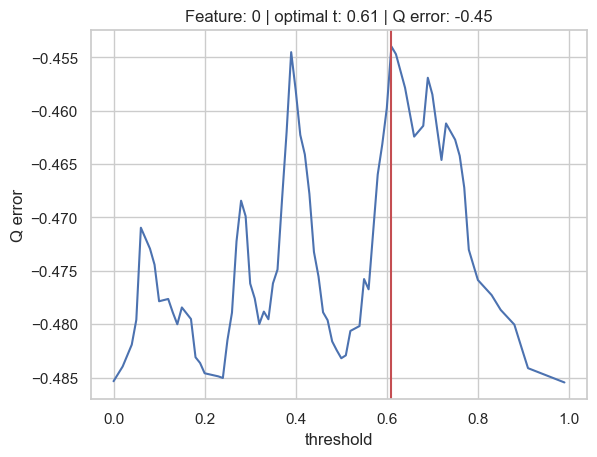

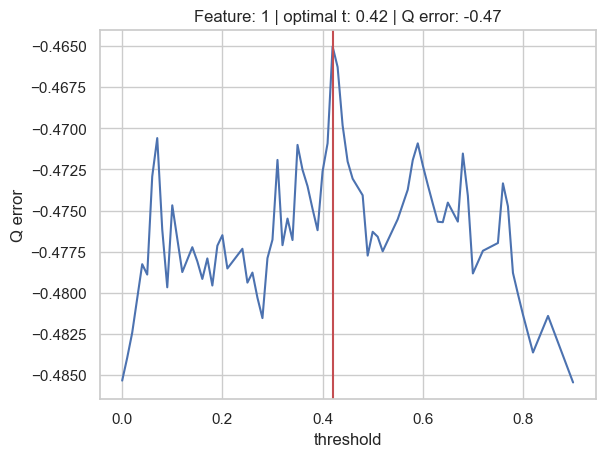

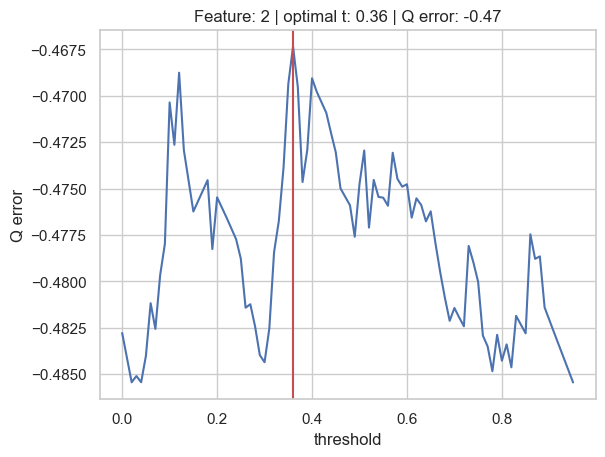

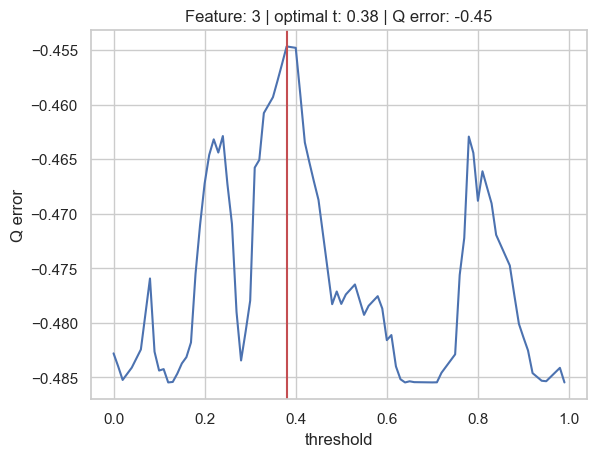

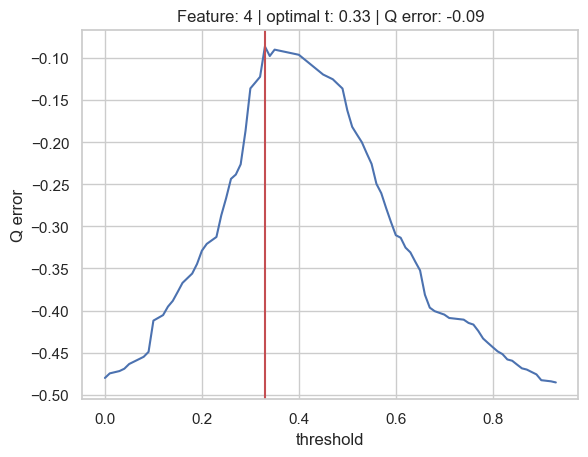

In [ ]:
#кривые "порог — значение критерия Джини"

results=[]

X=data.drop(columns=['UNS'])
X=np.array(X)
y=data['UNS']
y=np.array(y)

for feature in range(X.shape[1]):
    thresholds, ginis, threshold_best, gini_best=find_best_split(X[:, feature], y)
    results.append((feature, threshold_best, gini_best))
    plt.plot(thresholds, ginis)
    plt.title(f'Feature: {feature} | optimal t: {threshold_best} | Q error: {gini_best:.2f}')
    plt.xlabel("threshold")
    plt.ylabel("Q error")
    plt.axvline(x=threshold_best, c='r')
    plt.show()

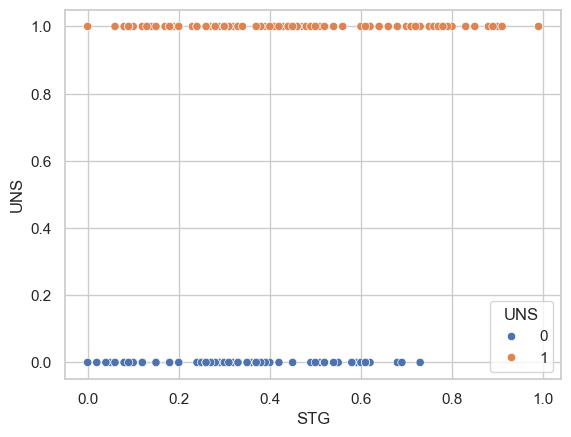

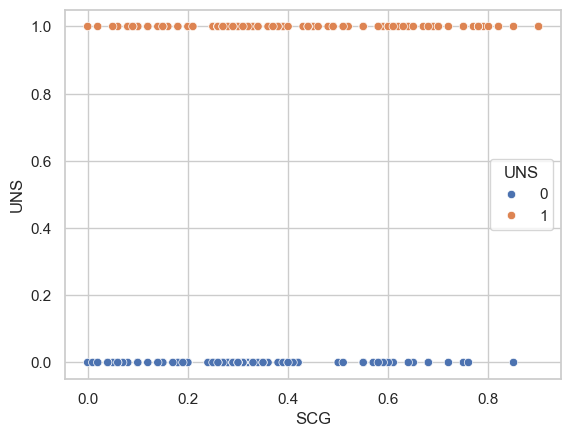

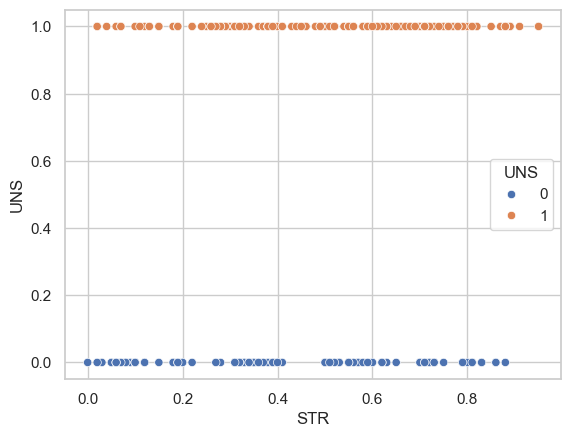

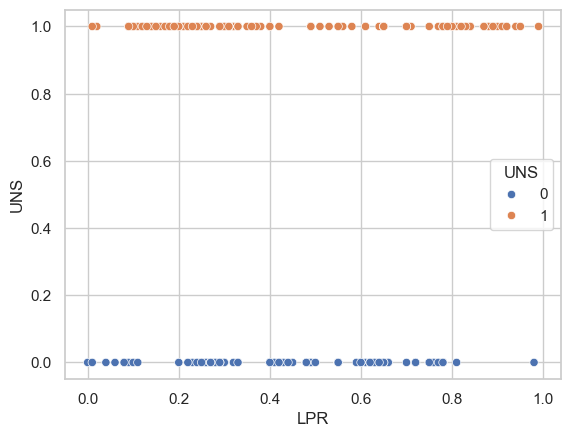

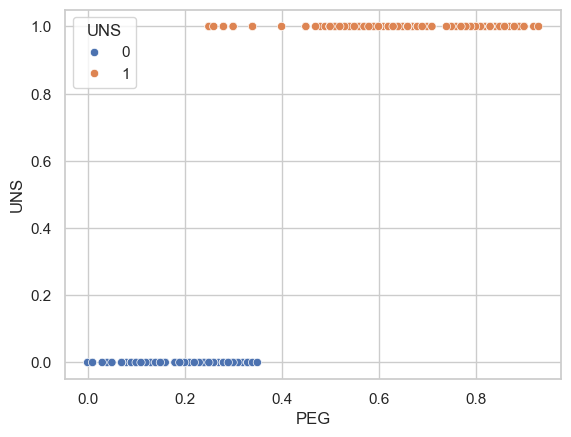

In [179]:
#scatter plots "значение признака — класс"

X=data.drop(columns=['UNS'])
y=data['UNS']
for feature in X.columns.to_list(): 
    sns.scatterplot(data=data, x=feature, y='UNS', hue="UNS")
    plt.show()

### **Задание 3. (0.6 балла)**

Проанализируйтте построенные кривые. Ответьте на поставленные вопросы:
- По какому признаку нужно производить деление выборки на два поддерева? (0.15 балла)
- Согласуется ли этот результат с визуальной оценкой scatter-графиков? (0.15 балла)
- Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? (0.15 балла)
- Чем отличаются кривые для признаков, по которым деление практически невозможно? (0.15 балла)

**Ответ:**

In [180]:
#Посмотрим на лучшие ошибки по каждому признаку и выберем самое близкое к 0 значение - это признак PEG при пороге 0,33  


pd.DataFrame(results, columns=["feature", "optimal t", "min Q error"])

#Этот результат согласуется со scaterplot, т.к. именно по этому признаку было видно наилучшее отделение класса 0

#Выборка делится почти идеально, если график кривой "порог - критерий  инвормативности" похож на параболу. Лучшее значение порога - в вершине параболы

#У "плохих" графиков много вершин и они сильно волатильны

,feature,optimal t,min Q error
0,STG,0.61,-0.453977
1,SCG,0.42,-0.465019
2,STR,0.36,-0.467338
3,LPR,0.38,-0.454668
4,PEG,0.33,-0.086066


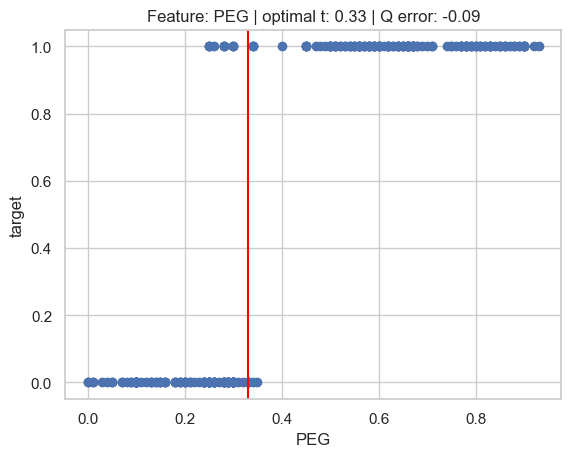

In [181]:
from operator import itemgetter

optimal_feature, optimal_t, optimal_error = results[np.argmax(list(map(itemgetter(2), results)))]
plt.scatter(X[optimal_feature], y)
plt.axvline(x=optimal_t, color="red")
plt.xlabel(optimal_feature)
plt.ylabel("target")
plt.title("Feature: {} | optimal t: {} | Q error: {:.2f}".format(optimal_feature, optimal_t, optimal_error))
plt.show()

### **Задание 4. (1.15 балла)**

В некоторых случаях необходимо анализировать код исполненного класса на предмет оптимальности и ошибок. Потренируйтесь в этом!

- Разберитесь с уже написанным кодом в классе DecisionTree модуля hw4_code_pro.py.
- Найдите ошибки в реализации метода \_fit_node.
- Напишите функцию \_predict_node.

**Примечание 1:**

Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2020-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева».
- Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

**Примечание 2:**

- Выбор лучшего разбиения необходимо производить по критерию Джини.
- Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку, чтобы Джини упал
- Ответ в листе: наиболее часто встречающийся класс в листе.


In [ ]:
def _fit_node(self, sub_X, sub_y, node):
        if np.all(sub_y != sub_y[0]):           #Узел должен быть терминальным, если в листе все объекты относятся к одному классу. По данному условию наоборот
                                                #хотя бы один объект должен быть иным (не равен sub_y[0])
            node["type"] = "terminal"
            node["class"] = sub_y[0]
            return

        feature_best, threshold_best, gini_best, split = None, None, None, None
        for feature in range(1, sub_X.shape[1]):    #Так потеряется первый столбец с индексом 0
            feature_type = self._feature_types[feature]
            categories_map = {}

            if feature_type == "real":
                feature_vector = sub_X[:, feature]
            elif feature_type == "categorical":
                counts = Counter(sub_X[:, feature])
                clicks = Counter(sub_X[sub_y == 1, feature])
                ratio = {}
                for key, current_count in counts.items():
                    if key in clicks:               
                        current_click = clicks[key] 
                    else:
                        current_click = 0
                    ratio[key] = current_count / current_click  #по смыслу надо поменять местами числитель и знаменатель, т.к. ищем долю 1 класса (долю click в count)
                                                                #(+ из if очевидно current_click может быть =0 => Error: Division by Zero)
                sorted_categories = list(map(lambda x: x[1], sorted(ratio.items(), key=lambda x: x[1])))
                categories_map = dict(zip(sorted_categories, list(range(len(sorted_categories)))))      #здесь закодированы только доли объектов 1 класса 
                                                                                                        #нужно добавить кодировку исходных категорий
                feature_vector = np.array(map(lambda x: categories_map[x], sub_X[:, feature]))          #ключи словаря и значения не мэтчатся
            else:
                raise ValueError

            if len(feature_vector) == 3:        #Если это останова по количеству объектов в листе, то не хватает else: node['type'] = 'terminal' и т.д.? 
                continue                        

            _, _, threshold, gini = find_best_split(feature_vector, sub_y)
            if gini_best is None or gini > gini_best:
                feature_best = feature
                gini_best = gini
                split = feature_vector < threshold          # < заменить  на <=

                if feature_type == "real":
                    threshold_best = threshold
                elif feature_type == "Categorical":   #categorical
                    threshold_best = list(map(lambda x: x[0],
                                              filter(lambda x: x[1] < threshold, categories_map.items()))) #словарь другой и <= вместо <
                else:
                    raise ValueError

        if feature_best is None:              #добавить в качестве критерия останова if np.all(sub_y == sub_y[0]) что все объекты в листе относятся к одному классу
            node["type"] = "terminal"
            node["class"] = Counter(sub_y).most_common(1) #нужно дастать класс, в такой реализации возвращается tuple(class, count)
            return

        node["type"] = "nonterminal"

        node["feature_split"] = feature_best
        if self._feature_types[feature_best] == "real":
            node["threshold"] = threshold_best
        elif self._feature_types[feature_best] == "categorical":
            node["categories_split"] = threshold_best
        else:
            raise ValueError
        node["left_child"], node["right_child"] = {}, {}
        self._fit_node(sub_X[split], sub_y[split], node["left_child"])
        self._fit_node(sub_X[np.logical_not(split)], sub_y[split], node["right_child"])  #тут будет не верно формироваться sub_y (по индексам левой ветки, а надо правой)

In [555]:
import numpy as np
from collections import Counter

class DecisionTree:
    def __init__(self, feature_types, max_depth=None, min_samples_split=3, min_samples_leaf=3):
        if np.any(list(map(lambda x: x != "real" and x != "categorical", feature_types))):
            raise ValueError("There is unknown feature type")

        self._tree = {}
        self._feature_types = feature_types
        self._max_depth = max_depth
        self._min_samples_split = min_samples_split
        self._min_samples_leaf = min_samples_leaf

    
    #исправленная реализация 
    def _fit_node(self, sub_X, sub_y, node):
        if np.all(sub_y == sub_y[0]):           
            node["type"] = "terminal"
            node["class"] = sub_y[0]
            return

        feature_best, threshold_best, gini_best, split = None, None, None, None
        for feature in range(sub_X.shape[1]):
            feature_type = self._feature_types[feature]
            categories_map = {}

            if feature_type == "real":
                feature_vector = sub_X[:, feature]
            elif feature_type == "categorical":
                counts = Counter(sub_X[:, feature])
                clicks = Counter(sub_X[sub_y == 1, feature])
                ratio = {}
                for key, current_count in counts.items():
                    if key in clicks:
                        current_click = clicks[key] 
                    else:
                        current_click = 0
                    ratio[key] = current_click/current_count

                sorted_categories = list(map(lambda x: x[1], sorted(ratio.items(), key=lambda x: x[1])))
                categories_with_ratio=list(map(lambda x: x[0], sorted(ratio.items(), key=lambda x: x[1])))
                categories_map = dict(zip(sorted_categories, list(range(len(sorted_categories)))))
                encoded_ratio= list(map(lambda x: categories_map[x], sorted_categories))
                cat_map=dict(zip(categories_with_ratio, encoded_ratio))
                feature_vector = list(map(lambda x: cat_map[x], sub_X[:, feature]))
            else:
                raise ValueError
            
            if len(feature_vector) <= self._min_samples_leaf:
                node["type"] = "terminal"
                node["class"] = Counter(sub_y).most_common(1)[0][0]
                return
            else:
                _, _, threshold, gini = find_best_split(feature_vector, sub_y)
                if gini_best is None or gini > gini_best:
                    feature_best = feature
                    gini_best = gini
                    split = feature_vector <= threshold

                    if feature_type == "real":
                        threshold_best = threshold
                    elif feature_type == "categorical":
                        threshold_best = list(map(lambda x: x[0],
                                                filter(lambda x: x[1] <= threshold, cat_map.items())))
                    else:
                        raise ValueError
                    
        if feature_best is None or np.all(sub_y == sub_y[0]):
            node["type"] = "terminal"
            node["class"] = Counter(sub_y).most_common(1)[0][0]
            return

        node["type"] = "nonterminal"

        node["feature_split"] = feature_best
        if self._feature_types[feature_best] == "real":
            node["threshold"] = threshold_best
        elif self._feature_types[feature_best] == "categorical":
            node["categories_split"] = threshold_best
        else:
            raise ValueError
        node["left_child"], node["right_child"] = {}, {}
        self._fit_node(sub_X[split], sub_y[split], node["left_child"])
        self._fit_node(sub_X[np.logical_not(split)], sub_y[np.logical_not(split)], node["right_child"])

    #дописанный метод _predict_node
    def _predict_node(self, x, node):
        # ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
        if node["type"] == "terminal":
            return node["class"]
        
        feature_index = node["feature_split"]
        if self._feature_types[feature_index] == "real":
            if x[feature_index] <= node["threshold"]:
                return self._predict_node(x, node["left_child"])
            else:
                return self._predict_node(x, node["right_child"])
        elif self._feature_types[feature_index] == "categorical":
            if np.any(x[feature_index] == node["categories_split"]):
                return self._predict_node(x, node["left_child"])
            else:
                return self._predict_node(x, node["right_child"])
        else:
            raise ValueError("Unknown feature type")
       
    
    def fit(self, X, y):
        self._fit_node(X, y, self._tree)


    def predict(self, X):
        predicted = []
        for x in X:
            predicted.append(self._predict_node(x, self._tree))
        return np.array(predicted)
    

    def get_params(self, deep):
        return {
            "feature_types": self._feature_types,
            "max_depth": self._max_depth,
            "min_samples_split": self._min_samples_split,
            "min_samples_leaf": self._min_samples_leaf,
        }

### **Задание 5. (0.5 балла)**

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Для этого:

- Скачайте таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/))
- Прочитайте данные с помощью pandas
- Примените к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа.
- Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные)
- Сделайте предсказания для оставшейся половины.
- Вычислите accuracy (так как мы используем эту метрику и в силу задачи, нам не очень важно, что будет классом 1, а что — классом 0).  


У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [481]:
# Ваш код здесь
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"

columns = ['class', 'cap_shape', 'cap_surface', 'cap_color', 'bruises', 
           'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 
           'gill_color', 'stalk_shape', 'stalk_root', 'stalk_surface_above_ring', 
           'stalk_surface_below_ring', 'stalk_color_above_ring', 
           'stalk_color_below_ring', 'veil_type', 'veil_color', 
           'ring_number', 'ring_type', 'spore_print_color', 
           'population', 'habitat']
df_mashrooms = pd.read_csv(url, names=columns)
df_mashrooms.sample(7)

,class,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
6145,p,f,y,e,f,s,f,c,n,b,...,s,w,w,p,w,o,e,w,v,l
725,p,x,y,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,n,v,g
685,e,x,y,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
5883,e,k,y,n,t,n,f,c,b,e,...,s,e,e,p,w,t,e,w,c,w
361,e,x,f,n,f,n,f,w,b,p,...,f,w,w,p,w,o,e,k,a,g
2842,e,x,y,n,t,n,f,c,b,p,...,s,g,g,p,w,o,p,n,y,d
2355,e,x,f,e,t,n,f,c,b,n,...,s,p,g,p,w,o,p,k,v,d


In [482]:
X = df_mashrooms.drop(columns=['class'])
y = df_mashrooms['class']
X

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,s,o,o,p,o,o,p,b,c,l
8120,x,s,n,f,n,a,c,b,y,e,...,s,o,o,p,n,o,p,b,v,l
8121,f,s,n,f,n,a,c,b,n,e,...,s,o,o,p,o,o,p,b,c,l
8122,k,y,n,f,y,f,c,n,b,t,...,k,w,w,p,w,o,e,w,v,l


In [483]:
y

0       p
1       e
2       e
3       p
4       e
       ..
8119    e
8120    e
8121    e
8122    p
8123    e
Name: class, Length: 8124, dtype: object

In [484]:
y.value_counts()

class
e    4208
p    3916
Name: count, dtype: int64

In [489]:
y = list(map(lambda x: 1 if x == 'p' else 0, y))

In [490]:
#Примените к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа.

from sklearn.preprocessing import LabelEncoder

encoders = {}

for col in X.columns:
    encoder = LabelEncoder()
    X[col] = encoder.fit_transform(X[col])
    encoders[col] = encoder


# # Обратное преобразование
# decoded_X = pd.DataFrame(columns=X.columns)
# for col in X.columns:
#     decoded_col = encoders[col].inverse_transform(X[col])
#     decoded_X[col] = decoded_col

X

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,0,11,0,...,2,5,5,0,1,1,4,0,1,2
8120,5,2,4,0,5,0,0,0,11,0,...,2,5,5,0,0,1,4,0,4,2
8121,2,2,4,0,5,0,0,0,5,0,...,2,5,5,0,1,1,4,0,1,2
8122,3,3,4,0,8,1,0,1,0,1,...,1,7,7,0,2,1,0,7,4,2


In [516]:
#Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) - #Вопрос: мы же их закодировали на предыдущем шаге, значит числовые?

X_train = X.sample(int(X.shape[0]/2))
indexes = X_train.index.to_list()
X_train.reset_index(drop=True, inplace=True)
print(X_train.shape[0])

y=np.array(y)
y_train=y[indexes]
print(len(y_train))

feature_types = 'real, ' * len(X_train.columns)
feature_types = feature_types.split(', ')[0:-1]

tree = DecisionTree(feature_types=feature_types)
tree.fit(np.array(X_train), y_train)

4062
4062


In [517]:
#Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) 

X_train = X.sample(int(X.shape[0]/2))
indexes = X_train.index.to_list()
X_train.reset_index(drop=True, inplace=True)
print(X_train.shape[0])

y=np.array(y)
y_train=y[indexes]
print(len(y_train))

feature_types = 'categorical, ' * len(X_train.columns)
feature_types = feature_types.split(', ')[0:-1]

tree = DecisionTree(feature_types=feature_types)
tree.fit(np.array(X_train), y_train)

4062
4062


In [518]:
#Сделайте предсказания для оставшейся половины.
test_indexes = list(set(X.index)-set(indexes))
X_test=X.loc[test_indexes]
print(len(X_test))

preds = tree.predict(np.array(X_test))
print(len(preds))
preds

4062
4062


array([1, 0, 0, ..., 0, 0, 0])

In [519]:
#Вычислите accuracy (так как мы используем эту метрику и в силу задачи, нам не очень важно, что будет классом 1, а что — классом 0).
from sklearn.metrics import accuracy_score

y_test=y[test_indexes]
print(len(y_test))

print(f'Accuracy: {accuracy_score(y_test, preds)}')


4062
Accuracy: 0.9992614475627769


### **Задание 6. (бонус, 1 балл)**

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующее задание).

### **Задание 7. (2 балла)**

**1. Загрузите следующие наборы данных** (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (они записаны в Data Folder, в файле *.names):
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце),
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

**2. Закодируйте категориальные признаки, использовав LabelEncoder.** С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

**Рекомендации:**
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами.

In [540]:
#Mashrooms
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"

columns = ['class', 'cap_shape', 'cap_surface', 'cap_color', 'bruises', 
           'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 
           'gill_color', 'stalk_shape', 'stalk_root', 'stalk_surface_above_ring', 
           'stalk_surface_below_ring', 'stalk_color_above_ring', 
           'stalk_color_below_ring', 'veil_type', 'veil_color', 
           'ring_number', 'ring_type', 'spore_print_color', 
           'population', 'habitat']
df_mashrooms = pd.read_csv(url, names=columns)

df_mashrooms['class']=df_mashrooms['class'].apply(lambda x: 0 if x == 'e' else 1)
df_mashrooms.sample(7)

,class,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
7260,0,x,s,g,f,n,f,w,b,w,...,s,w,w,p,w,t,p,w,n,g
8029,0,x,f,g,f,n,f,w,b,g,...,s,w,w,p,w,t,p,w,n,g
1257,0,f,f,n,f,n,f,w,b,h,...,f,w,w,p,w,o,e,k,s,g
1228,1,x,s,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,n,v,g
3367,0,f,y,e,t,n,f,c,b,w,...,s,w,g,p,w,o,p,k,v,d
7045,1,f,y,e,f,y,f,c,n,b,...,s,w,p,p,w,o,e,w,v,p
2739,0,x,y,e,t,n,f,c,b,u,...,s,p,w,p,w,o,p,k,y,d


In [541]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/tic-tac-toe/tic-tac-toe.data"

columns = ['top-left', 'top-middle', 'top-right', 'middle-left', 
           'middle-middle', 'middle-right', 'bottom-left', 
           'bottom-middle', 'bottom-right', 'class']
df_ttt = pd.read_csv(url, header=None, names=columns)

df_ttt['class'] = df_ttt['class'].apply(lambda x: 0 if x == 'negative' else 1)
df_ttt.sample(7)

,top-left,top-middle,top-right,middle-left,middle-middle,middle-right,bottom-left,bottom-middle,bottom-right,class
148,x,o,o,x,x,x,b,o,b,1
179,x,o,o,b,x,x,b,o,x,1
345,o,x,b,x,x,x,o,o,b,1
675,x,o,x,x,o,o,b,o,x,0
682,x,o,x,o,o,o,b,x,x,0
348,o,x,b,x,x,o,o,x,b,1
245,x,b,o,x,x,b,x,o,o,1


In [535]:
#cars
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data"

columns = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "class"]
df_cars = pd.read_csv(url, header=None, names=columns)

#считаем что unacc, acc — это класс 0, good, vgood — класс 1
df_cars['class'] = df_cars['class'].apply(lambda x: 0 if x in ['unacc', 'acc'] else 1)
df_cars.sample(7)

,buying,maint,doors,persons,lug_boot,safety,class
317,vhigh,med,5more,more,small,high,0
1559,low,med,3,more,small,high,1
376,vhigh,low,3,more,big,med,0
1554,low,med,3,4,big,low,0
1717,low,low,5more,4,big,med,1
892,med,vhigh,3,2,small,med,0
1062,med,high,5more,4,small,low,0


In [548]:
#nursery
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/nursery/nursery.data"

columns = ['parents', 'has_nurs', 'form', 'children', 'housing', 'finance', 
           'social', 'health', 'class']
df_nursery = pd.read_csv(url, header=None, names=columns)

#считаем что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1
df_nursery['class'] = df_nursery['class'].apply(lambda x: 0 if x in ['not_recom', 'recommend'] else 1)
df_nursery.sample(7)

,parents,has_nurs,form,children,housing,finance,social,health,class
2186,usual,improper,incomplete,1,less_conv,convenient,problematic,not_recom,0
7484,pretentious,critical,incomplete,3,less_conv,inconv,slightly_prob,not_recom,0
12914,great_pret,very_crit,foster,more,convenient,convenient,problematic,not_recom,0
12692,great_pret,very_crit,incomplete,more,convenient,convenient,nonprob,not_recom,0
5307,pretentious,less_proper,complete,3,convenient,inconv,problematic,recommended,1
10066,great_pret,less_proper,incomplete,3,less_conv,convenient,slightly_prob,priority,1
6300,pretentious,improper,completed,1,critical,convenient,nonprob,recommended,1


In [549]:
for df in [df_mashrooms, df_ttt, df_cars, df_nursery]:
    for col in df.drop(columns=['class']).columns:
        encoder = LabelEncoder()
        df[col] = encoder.fit_transform(df[col])
        encoders[col] = encoder

In [550]:
df_mashrooms.sample(3)

,class,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
1951,0,5,3,2,1,5,1,0,0,9,...,2,6,6,0,2,1,4,3,4,0
1798,1,2,3,8,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,4,5
3322,1,5,0,5,0,1,1,0,1,9,...,2,7,7,0,2,1,4,3,3,0


In [551]:
df_ttt.sample(3)

,top-left,top-middle,top-right,middle-left,middle-middle,middle-right,bottom-left,bottom-middle,bottom-right,class
14,2,2,2,1,2,1,1,1,2,1
365,1,1,2,2,2,2,2,1,1,1
495,0,2,2,0,1,2,1,1,2,1


In [552]:
df_cars.sample(3)

,buying,maint,doors,persons,lug_boot,safety,class
417,3,1,3,1,1,1,0
717,0,2,2,1,0,1,0
747,0,2,3,2,2,1,0


In [553]:
df_nursery.sample(3)

,parents,has_nurs,form,children,housing,finance,social,health,class
4894,1,3,3,2,2,1,1,1,1
12172,0,4,0,1,2,0,2,1,1
9861,0,2,1,2,2,1,1,2,1


In [566]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

#DecisionTree with all 'real' features
feature_types = 'real, ' * len(X_train.columns)
feature_types = feature_types.split(', ')[0:-1]
model_1 = DecisionTree(feature_types=feature_types)
#DecisionTree with all 'categorical' features
feature_types = 'categorical, ' * len(X_train.columns)
feature_types = feature_types.split(', ')[0:-1]
model_2 = DecisionTree(feature_types=feature_types)

#DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
#Мы уже сделали LabelEncoding, не понятно зачем сверху еще делать OHE - пропустила

#Sklearn DecisionTreeClassifier
model_3 = DecisionTreeClassifier()

result = {}
for name, df in {'df_mashrooms': df_mashrooms, 'df_ttt': df_ttt, 'df_cars': df_cars, 'df_nursery': df_nursery}.items():
    X=np.array(df.drop(columns=['class']))
    y=np.array(df['class'])
    accuracy_for_df = []
    for model in [model_1, model_2, model_3]:
        cvs = cross_val_score (model, 
                                X, 
                                y, 
                                cv=10, 
                                scoring='accuracy')
        accuracy_for_df.append(cvs.mean())
    result[name] = accuracy_for_df
result

{'df_mashrooms': [0.9992610837438424, 1.0, 0.956689025018329],
 'df_ttt': [0.46649122807017535, 0.551875, 0.7623245614035087],
 'df_cars': [0.9449657211990858, 0.9658152977550746, 0.9432853878209437],
 'df_nursery': [0.9996141975308642, 0.9998456790123458, 0.9996913580246914]}

In [567]:
pd.DataFrame(result, index=['model_1', 'model_2', 'model_3'])

,df_mashrooms,df_ttt,df_cars,df_nursery
model_1,0.999261,0.466491,0.944966,0.999614
model_2,1.000000,0.551875,0.965815,0.999846
model_3,0.956689,0.762325,0.943285,0.999691


### **Задание 8. (0.5 балла)**

Проанализируйте результаты эксперимента. Ответьте на вопросы:
- Одинаково ли для разных наборов данных ранжируются алгоритмы?
Порассуждайте, почему так происходит.
- Обратите внимание на значение признаков в разных наборах данных.
Присутствует ли в результатах какая-то компонента случайности?
- Если случайность есть, то можно ли повлиять на нее и улушить работу алгоритмов?

**Ответ:**

* Алгоритмы ранжируются по-разному. Все зависит от количества признаков и насколько хорошо они связаны (описывают) с таргетом

# **2. Задача бинарной классификации реализованным деревом (4 балла)**

Всего за эту часть можно получить 4 балла.

В этом разделе вам необходимо решить задачу бинарной классификации самописным деревом и лесом из sklearn, а после интерпретировать лучшие модели. А именно:

- Извлечь данные из базы данных;
- Предобработать датасет;
- Обучить собственный класс DT и RF из `sklearn` в как базовом варианте (гиперпараметры по умолчанию), так и с подбором гиперпараметров;
- Интерпретировать алгоритмы при помощи LIME или SHAP.


### **Познакомимся с задачей: постановка**

У вас есть данные о полетах, обладающие следущими характеристиками:
- Для **каждого** клиента известна краткая информация о самом человеке, о типе билета и о рейсе, а также оценки клиента различным аспектам полета.
- Для **некоторых** клиентов известна их удовлетворенность полетом (satisfied или neutral or dissatisfied).

По данным необходимо обучить модель, предсказывающую удовлетворенность клиентов полетом. Итоговые предсказания нужно сделать для клиентов, **для которых ответ неизвестен.**

### **Получение данных:**

Компания держит все данные в облаке Яндекса в Postgresql. Данные разбиты на смысловые таблицы. Чтобы получить данные, вам необходимо подключиться к базе данных и добыть оттуда данные.

In [577]:
!mkdir -p ~/.postgresql && \
wget "https://storage.yandexcloud.net/cloud-certs/CA.pem" \
    --output-document ~/.postgresql/root.crt && \
chmod 0600 ~/.postgresql/root.crt

�訡�� � ᨭ⠪�� �������.


### **Задание 9. Получение данных (0.5 балла)**

- Подключитесь к БД при помощи `psycopg2.connect()`
- Напишите SQL-запрос, объединяющий 3 нужные таблицы в одну
- Результат запроса поместите в `pd.DataFrame`. Индексом получившегося датафрейма сделайте столбец 'id'.

Список столбцов таблиц добудьте самостоятельно.


**Примечание:**
 Не забудьте закрыть соединение. Или открывайте соединение, используя менеджер контекста `with as`, который закроет его автоматически

##### **Параметры соединения:**
```
host=rc1b-70q90cunwkzx49mj.mdb.yandexcloud.net
port=6432
sslmode=verify-full
dbname=db_flights
user=mlhs_student
password=mlhs_student
target_session_attrs=read-write```
```

##### **Схема БД**

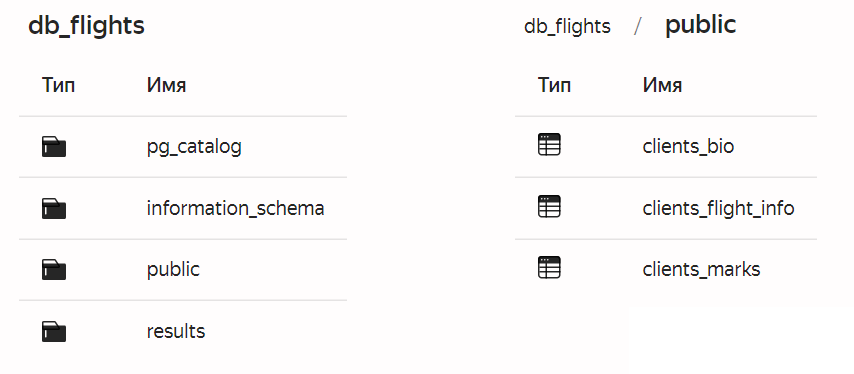

In [ ]:
# Ваш код здесь

In [ ]:
assert df.shape == (129_549, 23)

Разобьем датасет на тренировочную и тестовую части. Тестовую часть отложим надолго -- до самого конца этого ноутбука.

In [ ]:
df_train = df[df.satisfaction != '-']

df_train.head()

In [ ]:
assert df_train.shape == (103_644, 23)

In [ ]:
df_test = df[df.satisfaction == '-'].drop('satisfaction', axis=1)
df_test.head()

In [ ]:
assert df_test.shape == (25_905, 22)

Разбиваем данные на трейн и валидацию. Не меняйте сид.

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(df_train.drop('satisfaction', axis=1), df_train.satisfaction, test_size=0.3, random_state=42)

In [ ]:
assert X_train.shape == (72_550, 22)
assert X_val.shape == (31_094, 22)

### **Задание 10 (0.25 балла)**

- Преобразуйте числовые столбцы в `float`. Проверьте, есть ли в датафрейме пропуски и выбросы (в том числе в категориальных признаках)
- Заполните пропуски в данных наиболее часто встречающимся значением.
Помните про правильность заполнения.
- Выведите основные статистики по числовым и категориальным столбцам таблицы
- Сделайте **текстовый** вывод о распределениях значений признаков

In [ ]:
# Ваш код здесь

`Ваш ответ здесь`

### **Задание 11. (2 балла)**

Осуществите предобработку датасета для обучения **полностью самостоятельно**, на основе вашего опыта из прошлых дз и изученной теории. Обязательно **комментируйте** каждое действие.

**Примечание:**

В данном задании ваша задача в том числе убедить ревьюера в достаточности предобработки.

In [ ]:
# Ваш код здесь

### **Задание 12. (0.25 балла)**

- Обучите самописное дерево и Random Forest с базовыми гиперпараметрами. Выведите `f1-score`.

In [ ]:
# Ваш код здесь

### **Задание 13. (0.4 баллa)**

- Попробуйте подобрать оптимальные гиперпараметры леса и дерева (если реализовали их в бонусе), используя [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html).
- Сравните качество полученных моделей и выберите лучшую. Лучшую модель сохраните в pickle.

**Важно:**  

Хотя бы один из гиперпараметров перебирайте из распределения (например, `uniform` из `scipy.stats`)

In [ ]:
# Ваш код здесь

### **Задание 14. Анализ моделей (0.1 балла)**

- Отобразите`feature_importances_` вашего лучшего случайного леса;
- Проанализируйте, какие признаки оказались важными?

In [ ]:
# Ваш код здесь

`Ваш ответ здесь. `

### **Задание 15. (0.25 балла)**
- Интерпретируйте важности признаков с помощью SHAP.
- Опишите полученый график

**Важно:** Для подсчета используйте 1000 случайных объектов, иначе не дождетесь за приемлемое время

**Вам может помочь:** [Статья "Интерпретация моделей и диагностика сдвига данных: LIME, SHAP и Shapley Flow"](https://habr.com/ru/company/ods/blog/599573/) из блога ods.ai на Хабре

In [ ]:
# Ваш код здесь

`Ваш ответ здесь. `

### **Задание 16. (0.25 балла)**

- Интерпретируйте важности признаков для одного прогноза с помощью LIME;
- Опишите полученный график для выбранного наблюдения

In [ ]:
# Ваш код здесь

`Ваш ответ здесь. `

## Котобонус!

0.25 балла

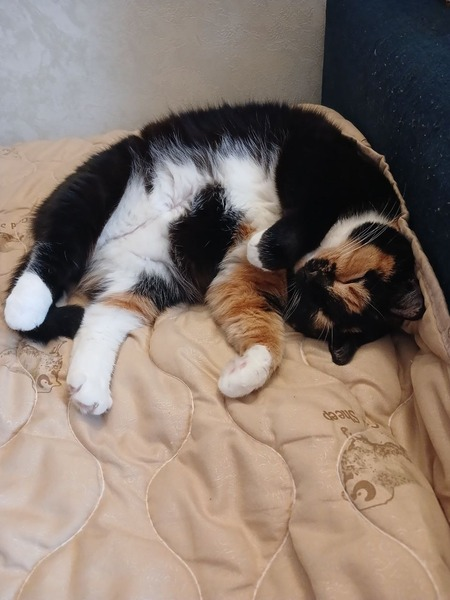

# Обратная связь

Расскажите, как вам это домашнее задание. Было ли оно полезным? Научились ли вы чему то? Насколько сложным по 10-балльной шкале оно вам показалось? Сколько времени у вас ушло на его выполнение? Что следовало ещё в него включить? Было ли что-то лишнее?